# "What are the most important factors for predicting whether a customer has converted or not?"

## Import libraries

In [212]:
import pandas as pd               # helps to read the dataset and to do most of the data preprocessing steps
import numpy as np                # to work with arrays
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization
%matplotlib inline

## 1. Read the data into panda dataframe

In [213]:
df = pd.read_csv("DS_customer_data_sample.csv")

In [214]:
df.head()

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki


Looking at the data, we can see that we have categorical and numerical features.

## 2. Exploratory Data Analysis

In [215]:
# See if our values are integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        891 non-null    int64  
 1   converted          891 non-null    int64  
 2   customer_segment   891 non-null    int64  
 3   gender             891 non-null    object 
 4   age                714 non-null    float64
 5   related_customers  891 non-null    int64  
 6   family_size        891 non-null    int64  
 7   initial_fee_level  891 non-null    float64
 8   credit_account_id  891 non-null    object 
 9   branch             889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [216]:
# The Statistical overview of our Data
df.describe()

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,15446.000000,0.383838,12.308642,29.699118,0.523008,0.381594,64.408416
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,99.386857
min,15001.000000,0.000000,11.000000,0.420000,0.000000,0.000000,0.000000
25%,15223.500000,0.000000,12.000000,20.125000,0.000000,0.000000,15.820800
50%,15446.000000,0.000000,13.000000,28.000000,0.000000,0.000000,28.908400
75%,15668.500000,1.000000,13.000000,38.000000,1.000000,0.000000,62.000000
max,15891.000000,1.000000,13.000000,80.000000,8.000000,6.000000,1024.658400


In [217]:
# We can drop customer_id and credit_account_id because it will not be usefull for our data analysis
df.drop(['customer_id', 'credit_account_id'], axis=1, inplace=True)

<AxesSubplot:xlabel='converted', ylabel='count'>

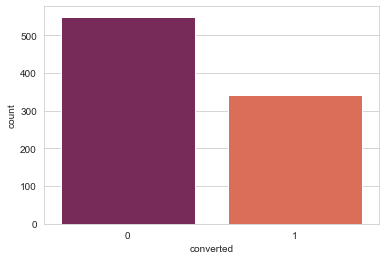

In [218]:
# Counter of the class 'converted' to see the class proportion
sns.set_style('whitegrid')
sns.countplot(x='converted', data=df, palette='rocket')

In [219]:
# Value counts of our class label
df['converted'].value_counts()

0    549
1    342
Name: converted, dtype: int64

We can tell that the degree of imbalance is mild. We don't need to apply any sampling technique.

## Missing data
We can get the information about the missing data by using boolean method .isnull() which returns TRUE or FALSE based on whether our values are present or not, 
and then sum() to see the toal count of missing data.

In [220]:
df.isnull().sum()

converted              0
customer_segment       0
gender                 0
age                  177
related_customers      0
family_size            0
initial_fee_level      0
branch                 2
dtype: int64

We can also look at the missing values by creating asimple heatmap, where the NaN values are represented in yellow

<AxesSubplot:>

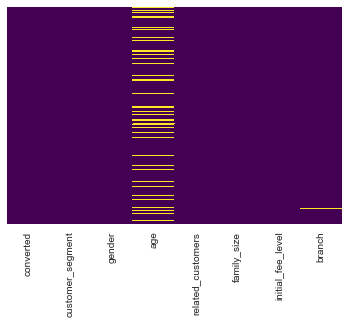

In [221]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 25% of the 'age' data is missing. The proportion of the missing data is likely small enough for reasonable replacement with some form of imputation. Looking at the 'branch' column, it looks like we are just missing two values.

### Handling missing data in the 'branch' feature

<AxesSubplot:>

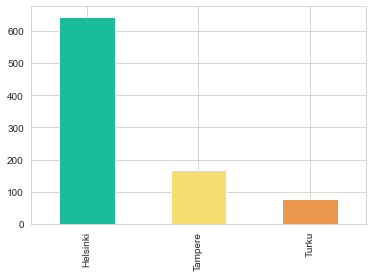

In [222]:
# Visualizing the value counts of feature'branch'
df['branch'].value_counts().plot.bar(color=['#1ABC9C','#F7DC6F','#EB984E'])

In [223]:
df['branch'].value_counts()

Helsinki    644
Tampere     168
Turku        77
Name: branch, dtype: int64

We can see that the most frequent value in branch is 'Helsinki'.

Now let's handle missing categorical values in feature 'branch' by replacing the NaN values with the most frequent value.

##### Note: We can't delete the rows containing the missing value, because the data might be important & also we don't have a lot of data points.

In [224]:
df['branch'].fillna('Helsinki', inplace=True)

### Handling the missing data in age column
#### Continue on exploratory analysis

From the heatmap, we can clearly see that the starongest negative correlation between the class label 'converted' is with features 'customer_segment' and 'age'
whereas the strongest positive correlation is with the feature 'initial_fee_level'

<AxesSubplot:>

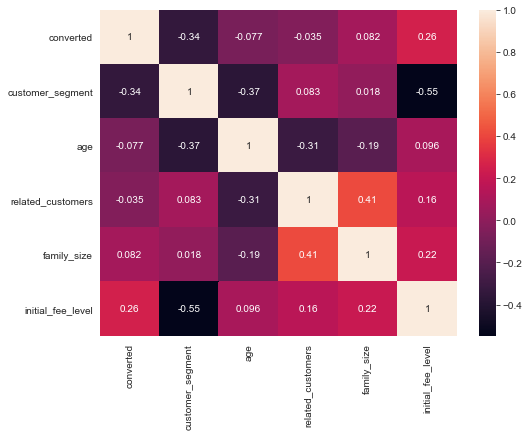

In [225]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(8,6))
sns.heatmap(df[top_features].corr(), annot=True)

Based on class 'converted', let's see customer_segment to find more information about the relationship between the two

<AxesSubplot:xlabel='converted', ylabel='count'>

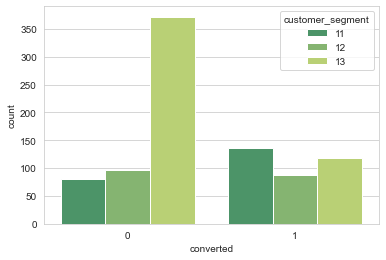

In [226]:
sns.set_style('whitegrid')
sns.countplot(x='converted', hue='customer_segment', data=df, palette='summer')

The plot below represents the relationship between the class converted and the feature 'gender'. 
Knowing this relationship we can get an idea about what kind of replacement we can use in our case of age.

<AxesSubplot:xlabel='converted', ylabel='count'>

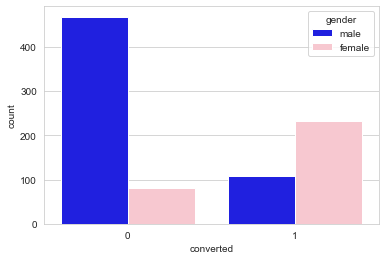

In [227]:
sns.set_style('whitegrid')
sns.countplot(x='converted', hue='gender', data=df, palette=['blue',"pink"])

<AxesSubplot:xlabel='age', ylabel='Count'>

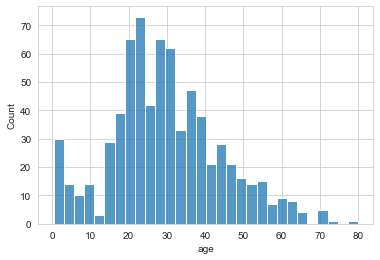

In [228]:
# Age distribution
sns.histplot(df['age'].dropna(), kde=False, bins=30)

We can see that age wihtout NaN values are normally distributed. 

The plot abow also gives us an idea of people of maximum avg of age. 

### Data Cleaning
We want to fill in the missing age data instead of just dropping the rows containing the missing values.
One why to do this is by filling in the mean of the age of all the people (imputation). However we can be smarter about this and check the avg age by customer_segment.

<AxesSubplot:xlabel='customer_segment', ylabel='age'>

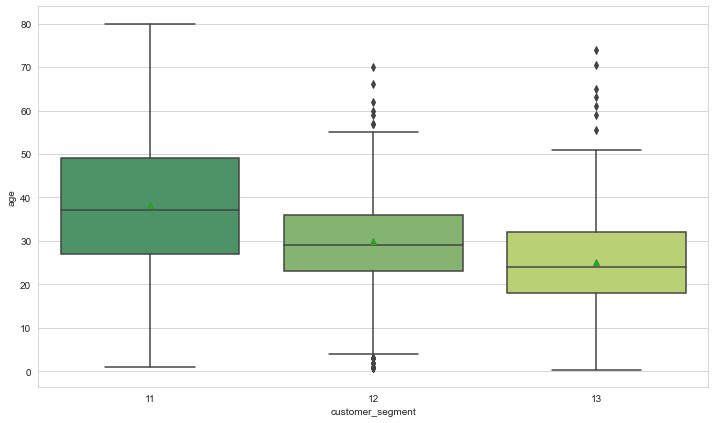

In [229]:
# Box-plot
plt.figure(figsize=(12,7))
sns.boxplot(x='customer_segment', y='age', data=df, showmeans=True, palette="summer")

Boxplot gives a lot of information about the age in respect to the customer_segment. For example, we can see what is the mean of the age in each customer_segment.


The idea behind filling the missing age values: Depending on in which customer_segment the person is, we will replace the NaN age value with the mean of that particular customer_segment class.

In [230]:
def impute_age(col):
    age = col[0]
    customer_seg = col[1]
    
    if pd.isnull(age):
        if customer_seg == 11:
            return 37           
        elif customer_seg == 12
            return 29
        else:
            return 24
    else:
        return age

SyntaxError: invalid syntax (<ipython-input-230-a4a2ae7274d7>, line 8)

Applying the function on age column. 
Final step of handling the missing data in age.

In [231]:
df['age'] = df[['age','customer_segment']].apply(impute_age, axis=1)

Now we can clearly see that we have no missing values in our data. Great!!!

<AxesSubplot:>

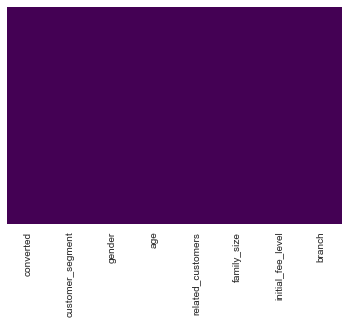

In [232]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Summary: We handled missing data with the help of statistical methods

## 3. Label encoding

We need to perform label encoding on our categorical features

In [233]:
# Label enconding on "gender" column
df['gender'] = np.where(df['gender']=='male',1,0)

In [234]:
# We should see some update
df.head()

,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,branch
0,0,13,1,22.0,1,0,14.5000,Helsinki
1,1,11,0,38.0,1,0,142.5666,Tampere
2,1,13,0,26.0,0,0,15.8500,Helsinki
3,1,11,0,35.0,1,0,106.2000,Helsinki
4,0,13,1,35.0,0,0,16.1000,Helsinki


In [235]:
# Label encoding on branch
ordinal_labels = {k: x for x, k in enumerate(df['branch'].unique(), 0)}
df['branch'] = df['branch'].map(ordinal_labels)

In [236]:
ordinal_labels

{'Helsinki': 0, 'Tampere': 1, 'Turku': 2}

In [237]:
# We should see some update
df.head()

,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,branch
0,0,13,1,22.0,1,0,14.5000,0
1,1,11,0,38.0,1,0,142.5666,1
2,1,13,0,26.0,0,0,15.8500,0
3,1,11,0,35.0,1,0,106.2000,0
4,0,13,1,35.0,0,0,16.1000,0


## 4. Feature Selection

### Test-Treain Split

In [238]:
from sklearn.model_selection import train_test_split 

In [239]:
# Train-Test split to avoid overfitting (data leakage)
X_train, X_test, y_train, y_test = train_test_split(df[['customer_segment','gender','age','related_customers','family_size','initial_fee_level','branch']], df['converted'], test_size = 0.3, random_state=0)

In [240]:
X_train.head()

,customer_segment,gender,age,related_customers,family_size,initial_fee_level,branch
857,11,1,51.0,0,0,53.1000,0
52,11,0,49.0,1,0,153.4584,1
386,13,1,1.0,5,2,93.8000,0
124,11,1,54.0,0,1,154.5750,0
578,13,0,24.0,1,0,28.9166,1


## Mutual Information

MI Estimate mutual information for discrete target variable.

In short: MI measured the amount of information one can obtain from one random variable given together.

In [241]:
from sklearn.feature_selection import mutual_info_classif

In [242]:
# to determine mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.0732231 , 0.18662283, 0.03459749, 0.03783725, 0.02196731,
       0.08342966, 0.0329351 ])

In [243]:
# Creating a series where X_train column is assigned as the index
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

gender               0.186623
initial_fee_level    0.083430
customer_segment     0.073223
related_customers    0.037837
age                  0.034597
branch               0.032935
family_size          0.021967
dtype: float64

#### Observation: The higher MI value, the more important the feature is

<AxesSubplot:>

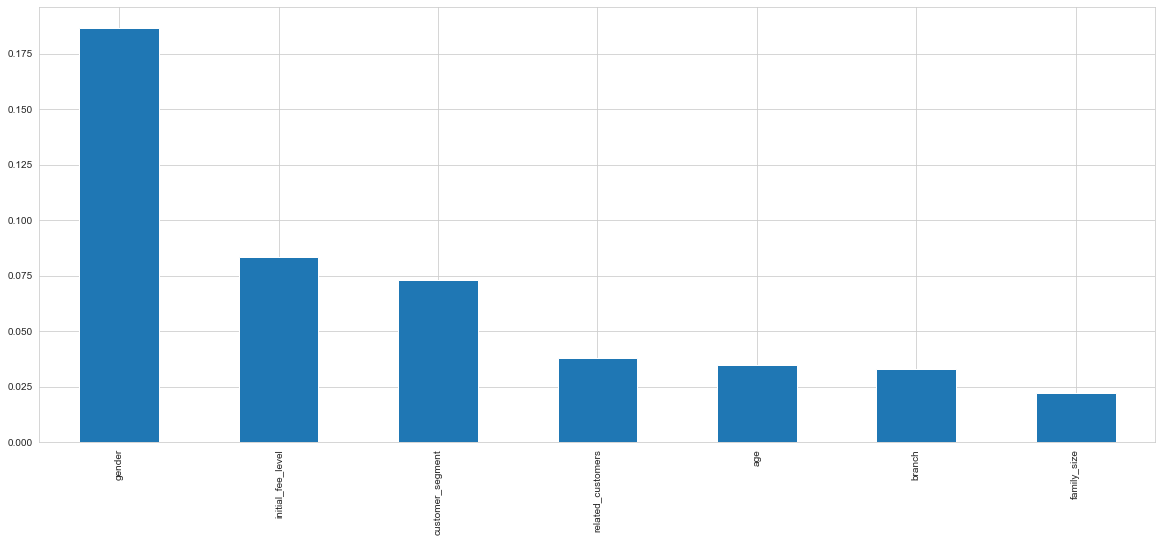

In [244]:
# Plot of the asceding mutual info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

### Select K Best features

In [245]:
from sklearn.feature_selection import SelectKBest

In [247]:
# We will select top 3 most important features
top_3_features = SelectKBest(mutual_info_classif, k=3)
top_3_features.fit(X_train, y_train)
X_train.columns[top_3_features.get_support()]

Index(['customer_segment', 'gender', 'initial_fee_level'], dtype='object')

# Summary: based on Mutual Information gain and SelectKBest the most important features are 
### 1. Gender
### 2. Initial fee level
### 3. Customer segment

In [248]:
# Thanks and goodbye